# Figure 5

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def plot_create():
    plt.title('S phase reduction dominates spinal cord outgrowth', y=1.05, size=30)    
    ax.legend(loc='upper left', facecolor='white')    
    plt.xlabel('Time (days)')
    plt.ylabel('Outgrowth' + ' (' + r'$\mu$'+'m)')
    plt.xlim(-0.2,8.2)
    plt.ylim(-50,2500)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 12.5)
    plt.rcParams.update({'font.size': 32})
    filename = "../../Plots/" + "Fig_5.png"
    fig.savefig(filename, dpi=300)

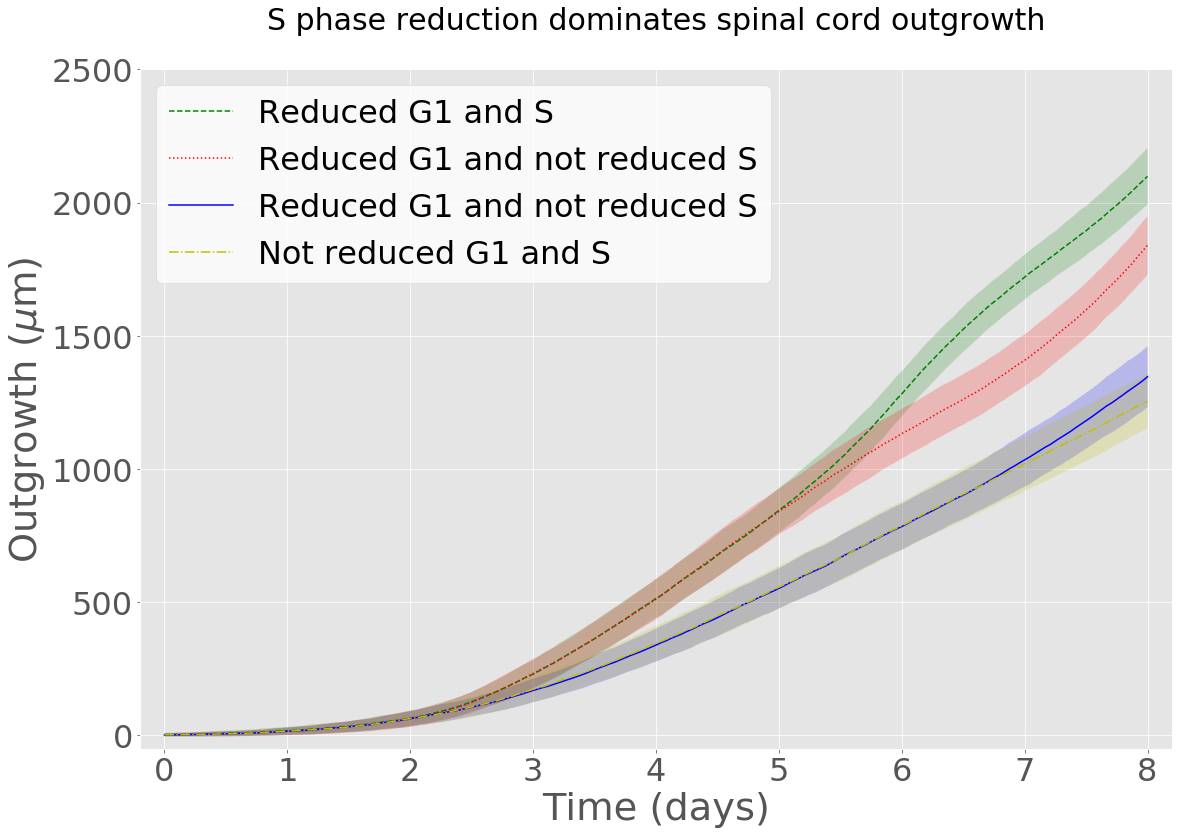

In [5]:
n0 = 205
rl = -1045
tv = 44

fig = plt.figure()
ax = fig.add_subplot(111)

# Both phases working
root = '../../Simulations/Models/Shrink-Shrink/n0=205_rl=-1045_tv='+str(tv)+'/Outgrowth/'
parameters_set = "n0="+str(n0)+"_rl="+str(rl)+"_tv="+str(tv)
df_all = []
files = os.listdir(root)
ordered_files = sorted(files)
for seed in ordered_files:    
    opened_file = open(root+seed)
    df0 = pd.read_csv(opened_file, delimiter=',')
    outgrowth = df0['outgrowth']*13.2
    df_all.append(outgrowth)
df_all = pd.concat(df_all, ignore_index=True, axis=1)
df_mean = np.asarray(df_all.mean(axis=1))
df_std = np.asarray(df_all.std(axis=1))
time = df0['time']/24
ax.plot(time, df_mean, color='g',linestyle='--', label="Reduced G1 and S")
ax.fill_between(time, df_mean-df_std, df_mean+df_std, facecolor='g', alpha=0.2)
#ax.fill_between(time, df_mean-2*df_std, df_mean+2*df_std, where=(df_mean-2*df_std)<(df_mean-df_std), facecolor='g', alpha=0.2)


# Only S phase working
root = '../../Simulations/Phases/Shrink-Shrink/Only_S/n0=205_rl=-1045_tv='+str(tv)+'/'
parameters_set = "n0="+str(n0)+"_rl="+str(rl)+"_tv="+str(tv)
df_all = []
files = os.listdir(root)
ordered_files = sorted(files)
for seed in ordered_files:    
    opened_file = open(root+seed)
    df0 = pd.read_csv(opened_file, delimiter=',')
    outgrowth = df0['outgrowth']*13.2
    df_all.append(outgrowth)
df_all = pd.concat(df_all, ignore_index=True, axis=1)
df_mean1 = np.asarray(df_all.mean(axis=1))
df_std1 = np.asarray(df_all.std(axis=1))

ax.plot(time, df_mean1, color='r',linestyle=':', label="Reduced G1 and not reduced S")
ax.fill_between(time, df_mean1-df_std1, df_mean1+df_std1, facecolor='r', alpha=0.2)
#ax.fill_between(time, df_mean1-2*df_std1, df_mean1+2*df_std1, where=(df_mean1-2*df_std1)<(df_mean1-df_std1), facecolor='r', alpha=0.2)


# Only G1 phase working
root = '../../Simulations/Phases/Shrink-Shrink/Only_G1/n0=205_rl=-1045_tv='+str(tv)+'/'
parameters_set = "n0="+str(n0)+"_rl="+str(rl)+"_tv="+str(tv)
df_all = []
files = os.listdir(root)
ordered_files = sorted(files)
for seed in ordered_files:    
    opened_file = open(root+seed)
    df0 = pd.read_csv(opened_file, delimiter=',')
    outgrowth = df0['outgrowth']*13.2
    df_all.append(outgrowth)
df_all = pd.concat(df_all, ignore_index=True, axis=1)
df_mean2 = np.asarray(df_all.mean(axis=1))
df_std2 = np.asarray(df_all.std(axis=1))

ax.plot(time, df_mean2, color='b', label="Reduced G1 and not reduced S")
ax.fill_between(time, df_mean2-df_std2, df_mean2+df_std2, facecolor='b', alpha=0.2)
#ax.fill_between(time, df_mean2-2*df_std2, df_mean2+2*df_std2, where=(df_mean2-2*df_std2)<(df_mean2-df_std2), facecolor='b', alpha=0.2)


# Proliferation impeded outgrowth
root = '../../Simulations/No_regeneration/n0=205/'
parameters_set = "n0="+str(n0)
df_all = []
files = os.listdir(root)
ordered_files = sorted(files)
for seed in ordered_files:    
    opened_file = open(root+seed)
    df0 = pd.read_csv(opened_file, delimiter=',')
    outgrowth = df0['outgrowth']*13.2
    df_all.append(outgrowth)
df_all = pd.concat(df_all, ignore_index=True, axis=1)
df_mean3 = np.asarray(df_all.mean(axis=1))
df_std3 = np.asarray(df_all.std(axis=1))

ax.plot(time, df_mean3, color='y',linestyle='-.', label="Not reduced G1 and S")
ax.fill_between(time, df_mean3-df_std3, df_mean3+df_std3, facecolor='y', alpha=0.2)
#ax.fill_between(time, df_mean3-2*df_std3, df_mean3+2*df_std3, where=(df_mean3-2*df_std3)<(df_mean3-df_std3), facecolor='y', alpha=0.2)


plot_create()